# **Análise de Dados de Tráfego Urbano 🚗**

### **Engenharia de Computação - Estrutura de Dados II - UFG**

**Discentes:**  
- Juliana Rocha  
- Vanderson Jesus  
- Wender Júnior  

---

## **Objetivo**
Construir um sistema para analisar dados de tráfego em uma cidade.

---

## **Requisitos**
1. **Estruturas de Dados**  
   - Utilizar tabelas hash para armazenar informações de veículos:  
     - **Campos:** Placa, Modelo, Localização.

2. **Consultas e Funcionalidades**  
   - Listar veículos em uma região específica.  
   - Gerar um ranking dos locais mais congestionados (usando ordenação).

3. **Simulação e Desempenho**  
   - Simular um conjunto de dados.  
   - Medir o tempo de execução das operações.

---

## **Desafios**
1. Simular dados realistas.  
2. Comparar o desempenho das operações realizadas pelo sistema.


# **1. Estrutura de Dados💾**

A tabela hash é usada por ser uma estrutura eficiente para busca, inserção e remoção de dados, com complexidade média de 𝑂(1). Ela é ideal para armazenar informações de tráfego, como veículos, pois permite acesso rápido aos dados por meio de chaves (ex.: placas), além de ser flexível para lidar com grandes volumes de informação.

In [43]:
class TabelaHash:
    def __init__(self, tamanho):
        """Inicializa a tabela hash com um tamanho fixo e usa encadeamento para colisões."""
        self.tamanho = tamanho
        self.tabela = [[] for _ in range(tamanho)]  # Lista de listas para encadeamento

    def funcao_hash(self, chave):
        """
        Função hash que retorna o índice onde o item será armazenado.
        Usamos o hash built-in do Python e garantimos que o índice caia dentro
        do tamanho da tabela.
        """
        return hash(chave) % self.tamanho

    def inserir(self, placa, modelo, localizacao):
        """
        Insere um item na tabela hash. Em caso de colisão, o item é adicionado à lista
        de itens na mesma posição da tabela.
        A chave é a placa, o valor é o modelo e a localização é um valor separado.
        """
        indice = self.funcao_hash(placa)
        # Atualiza o valor se a placa já existir
        for item in self.tabela[indice]:
            if item[0] == placa:
                item[1] = modelo
                item[2] = localizacao
                return
        # Adiciona a chave (placa), o valor (modelo) e a localização se não houver colisão
        self.tabela[indice].append([placa, modelo, localizacao])

    def buscar(self, placa):
        """
        Busca por um item na tabela hash. Retorna o modelo e a localização associados à placa se encontrar.
        """
        indice = self.funcao_hash(placa)
        for item in self.tabela[indice]:
            if item[0] == placa:
                return item[1], item[2]  # Retorna o modelo e a localização
        print("Placa não encontrada")
        return None, None  # Retorna None se a placa não for encontrada

    def excluir(self, placa):
        """
        Remove um item da tabela hash. Retorna True se a placa for encontrada e removida.
        Caso contrário, retorna False.
        """
        indice = self.funcao_hash(placa)
        for i, item in enumerate(self.tabela[indice]):
            if item[0] == placa:
                del self.tabela[indice][i]
                return True
        return False  # Retorna False se a placa não for encontrada

    def exibir(self):
        """Exibe a tabela hash e suas colisões com modelo e localização."""
        for i, bucket in enumerate(self.tabela):
            print(f"Bucket {i}: {bucket}")

    def contar_veiculos(self, setor):
        """
        Conta quantos veículos estão no mesmo setor.
        """
        indice = self.funcao_hash(setor)
        return len(self.tabela[indice])


# **2. Operações⚙️**

## **2.1 Importações de Bibliotecas**

In [2]:
import random  # Gera números aleatórios e faz escolhas aleatórias
import string  # Contém constantes como letras e dígitos para manipulação de strings
import csv  # Trabalha com arquivos CSV (leitura e escrita)
import os  #
from collections import defaultdict, Counter  # Importa classes úteis para contagem e organização de dados em coleções


## **2.1 Geração de Dados Aleatórios**



In [3]:
# Gera uma placa de veículo aleatória
def gerar_placa():
    return ''.join(random.choices(string.ascii_uppercase, k=3)) + '-' + ''.join(random.choices(string.digits, k=4))
# Exemplo de retorno: 'KZL-7482'

In [4]:
# Escolhe um modelo de carro com base nos modelos contidos no arquivo txt
def gerar_modelo():
    caminho_arquivo = '/content/drive/MyDrive/ED2 - PROJETO FINAL/Base de Dados/modelosCarros.txt'

    # Abrir o arquivo e ler as linhas
    with open(caminho_arquivo, 'r') as arquivo:
        modelos = [linha.strip() for linha in arquivo.readlines()]

    return random.choice(modelos)
# Exemplo de retorno: 'Volkswagen Polo'

In [5]:
# Variável global para armazenar a última localização
ultima_localizacao = None

def gerar_localizacao_randomica():
    global ultima_localizacao  # Permite alterar a variável global

    caminho_arquivo = '/content/drive/MyDrive/ED2 - PROJETO FINAL/Base de Dados/bairrosGoiania.csv'

    # Verificar se o arquivo existe
    if not os.path.exists(caminho_arquivo):
        raise FileNotFoundError(f"Arquivo não encontrado: {caminho_arquivo}")

    # Abrir o arquivo CSV e ler os códigos de bairro
    with open(caminho_arquivo, newline='', encoding='utf-8') as arquivo_csv:
        leitor_csv = csv.DictReader(arquivo_csv)
        bairros = [linha['CD_GEOCODS'] for linha in leitor_csv]

    if not bairros:
        raise ValueError("A lista de bairros está vazia. Verifique o conteúdo do arquivo CSV.")

    # Escolher uma nova localização diferente da atual
    nova_localizacao = ultima_localizacao
    while nova_localizacao == ultima_localizacao:
        nova_localizacao = random.choice(bairros)

    # Atualizar a última localização
    ultima_localizacao = nova_localizacao

    return nova_localizacao


In [45]:
import random

def atualizar_localizacoes_aleatorias_tabela(tabela, quantidade=100):
    """
    Atualiza a localização de um número especificado de veículos aleatórios na tabela hash.

    Parâmetros:
    tabela (TabelaHash): Instância da tabela hash contendo os veículos.
    quantidade (int): Número de veículos a serem atualizados. Default é 100.

    Retorna:
    None
    """
    # Coletar todas as placas na tabela
    registros = []
    for bucket in tabela.tabela:
        for item in bucket:
            registros.append(item[0])  # Coleta somente a placa

    # Garantir que a quantidade não exceda o número de registros disponíveis
    quantidade = min(quantidade, len(registros))

    # Selecionar aleatoriamente as placas a serem atualizadas
    placas_selecionadas = random.sample(registros, quantidade)

    # Atualizar as localizações das placas selecionadas
    for placa in placas_selecionadas:
        modelo, _ = tabela.buscar(placa)  # Obter o modelo e a localização atual
        nova_localizacao = gerar_localizacao_randomica()  # Gerar nova localização
        tabela.inserir(placa, modelo, nova_localizacao)  # Atualizar com a nova localização


## **2.2 Consultas de Tráfego**

In [8]:
def contar_veiculos_por_regiao(tabela_hash):
    """
    Conta quantos veículos existem em cada região com base na localização
    armazenada na tabela hash e retorna uma lista com as contagens.

    Parâmetros:
    tabela_hash (TabelaHash): Instância da classe TabelaHash.

    Retorno:
    list: Lista de tuplas com as regiões e suas respectivas contagens, ordenada por número de veículos (decrescente).
    """
    contador_regioes = Counter()

    # Percorre todos os buckets na tabela hash
    for bucket in tabela_hash.tabela:
        for item in bucket:  # Cada item é uma lista [placa, modelo, localizacao]
            _, _, localizacao = item
            contador_regioes[localizacao] += 1  # Incrementa o contador para a região

    # Ordenar regiões por número de veículos (decrescente)
    regioes_ordenadas = contador_regioes.most_common()

    # Retornar a lista de regiões ordenadas
    return regioes_ordenadas

In [7]:
def adicionar_nomes_ao_vetor(vetor, arquivo_csv):
    """
    Adiciona os nomes associados aos códigos do vetor usando os dados do arquivo CSV.

    :param vetor: Lista de tuplas (código, valor)
    :param arquivo_csv: Caminho para o arquivo CSV contendo as colunas 'CD_GEOCODS' e 'NM_SUBDIST'
    :return: Lista de tuplas (código, nome, valor)
    """
    # Carrega o CSV
    cod_para_nome = {}
    with open(arquivo_csv, mode='r', encoding='utf-8') as file:
        reader = csv.DictReader(file)  # Usar DictReader para mapear colunas por nome
        for linha in reader:
            cod = linha['CD_GEOCODS']
            nome = linha['NM_SUBDIST']
            cod_para_nome[cod] = nome

    # Adiciona os nomes ao vetor
    vetor_atualizado = []
    for codigo, valor in vetor:
        nome = cod_para_nome.get(codigo, "Nome não encontrado")  # Busca o nome pelo código
        vetor_atualizado.append((codigo, nome, valor))

    return vetor_atualizado


# **3. Avaliação de Desempenho🚀**

## **3.1 Importações de Bibliotecas**

In [9]:
import time  # Manipulação de tempo, como medir o tempo de execução de código ou adicionar delays

## **3.2 Função**

In [10]:
# Analisa o tempo de execução de uma determinada função
def avaliar_tempo_execucao(func, *args, **kwargs):
    """
    Função para avaliar o tempo de execução de uma operação (função).

    Parâmetros:
    func (callable): A função a ser executada.
    *args: Argumentos posicionais para passar para a função.
    **kwargs: Argumentos nomeados para passar para a função.

    Retorna:
    Resultado da execução da função e o tempo gasto.
    """
    # Marcar o tempo inicial
    tempo_inicial = time.time()

    # Executar a função com os argumentos fornecidos
    resultado = func(*args, **kwargs)

    # Marcar o tempo final
    tempo_final = time.time()

    # Calcular o tempo de execução
    tempo_execucao = tempo_final - tempo_inicial

    # Retornar o resultado e o tempo de execução
    return resultado, tempo_execucao

## **3.3 Testes + Análises**

In [11]:
# Criar uma instância da TabelaHash com tamnho de 1000 posições
# tabela = TabelaHash(1000)

In [12]:
# # Gera 10000 dados aleatórios e armazena em uma lista
# dados_10000_aleatorios = []
# for _ in range(10000):
#     placa = gerar_placa()
#     modelo = gerar_modelo()
#     localizacao = gerar_localizacao()
#     dados_10000_aleatorios.append((placa, modelo, localizacao))

In [13]:
# # Gera 40000 dados aleatórios e armazena em uma lista
# dados_40000_aleatorios = []
# for _ in range(40000):
#     placa = gerar_placa()
#     modelo = gerar_modelo()
#     localizacao = gerar_localizacao()
#     dados_40000_aleatorios.append((placa, modelo, localizacao))

In [14]:
# # # Gera 80000 dados aleatórios e armazena em uma lista
# dados_80000_aleatorios = []
# for _ in range(80000):
#     placa = gerar_placa()
#     modelo = gerar_modelo()
#     localizacao = gerar_localizacao()
#     dados_80000_aleatorios.append((placa, modelo, localizacao))

In [15]:
# # # Gera 100000 dados aleatórios e armazena em uma lista
# dados_100000_aleatorios = []
# for _ in range(100000):
#     placa = gerar_placa()
#     modelo = gerar_modelo()
#     localizacao = gerar_localizacao()
#     dados_100000_aleatorios.append((placa, modelo, localizacao))

In [16]:
# # Lista de diferentes dados para inserir
# dados_vetores = [dados_10000_aleatorios, dados_40000_aleatorios, dados_80000_aleatorios, dados_100000_aleatorios]

# # Lista para armazenar os tempos de execução
# tempos_execucao = []

# # Loop para testar os diferentes vetores de dados
# for dados in dados_vetores:
#     _, tempo_execucao = avaliar_tempo_execucao(lambda: [tabela.inserir(placa, modelo, localizacao) for placa, modelo, localizacao in dados])
#     tempos_execucao.append(tempo_execucao)

# # Quantidades de dados que estamos inserindo
# quantidades = [10000, 40000, 80000, 100000]

# # Plotar o gráfico
# plt.plot(quantidades, tempos_execucao, marker='o')
# plt.xlabel('Quantidade de Dados')
# plt.ylabel('Tempo de Execução (s)')
# plt.title('Tempo de Execução da Inserção de Dados na Tabela Hash')
# plt.grid(True)
# plt.show()

# # Exibir os tempos de execução
# for qtd, tempo in zip(quantidades, tempos_execucao):
#     print(f"Tempo de execução para inserir {qtd} dados: {tempo:.4f} segundos")

In [17]:
# import time

# def avaliar_tempo_execucao(funcao):
#     """
#     Avalia o tempo de execução de uma função.

#     :param funcao: Função que será executada e cujo tempo será medido.
#     :return: Tupla contendo o resultado da função e o tempo de execução em segundos.
#     """
#     inicio = time.time()  # Registra o tempo inicial
#     resultado = funcao()  # Executa a função
#     fim = time.time()  # Registra o tempo final
#     tempo_execucao = fim - inicio  # Calcula o tempo de execução
#     return resultado, tempo_execucao


In [18]:
# # Obtendo um aleatório para efetuar busca
# print(dados_10000_aleatorios[5489])
# print(dados_40000_aleatorios[39868])
# print(dados_80000_aleatorios[65784])
# print(dados_100000_aleatorios[89365])

In [19]:
# # Testar a função buscar
# placas_para_testar = ['MVT-7212', "CSX-1710", "XYZ-9999", "SUI-5012"]  # XYZ-9999 não existe na tabela

# print("Resultados da busca:")
# for placa in placas_para_testar:
#     modelo, localizacao = tabela.buscar(placa)
#     if modelo and localizacao:
#         print(f"Placa: {placa}, Modelo: {modelo}, Localização: {localizacao}")
#     else:
#         print(f"Placa: {placa} não encontrada.")

In [20]:
# # Testar a exclusão de um veículo
# placas_para_excluir = ['MVT-7212', "CSX-1710", "XYZ-9999", "SUI-5012"]  # XYZ-9999 não existe na tabela

# print("Resultados da exclusão:")
# for placa in placas_para_excluir:
#     sucesso = tabela.excluir(placa)
#     if sucesso:
#         print(f"Placa: {placa} foi removida.")
#     else:
#         print(f"Placa: {placa} não encontrada.")


In [21]:
# # Testar contagem de veículos por região
# contagem_regioes = contar_veiculos_por_regiao(tabela)
# print("Contagem de veículos por região:")
# for regiao, contagem in contador_regioes:
#     print(f"Região: {regiao}, Veículos: {contagem}")


In [22]:
# # Adicionar nomes aos códigos das regiões
# vetor_com_nomes = adicionar_nomes_ao_vetor(contagem_regioes, '/content/drive/MyDrive/ED2 - PROJETO FINAL/Base de Dados/bairrosGoiania.csv')

# print("Contagem de veículos por região com nomes:")
# for codigo, nome, contagem in vetor_com_nomes:
#     print(f"Código: {codigo}, Nome: {nome}, Veículos: {contagem}")


In [23]:
# # Lista de diferentes dados para inserir
# dados_vetores = [dados_10000_aleatorios, dados_40000_aleatorios, dados_80000_aleatorios, dados_100000_aleatorios]

# # Lista para armazenar os tempos de execução
# tempos_execucao = []

# # Loop para testar os diferentes vetores de dados
# for dados in dados_vetores:
#     _, tempo_execucao = avaliar_tempo_execucao(lambda: [tabela.inserir(placa, modelo, localizacao) for placa, modelo, localizacao in dados])
#     tempos_execucao.append(tempo_execucao)

# # Quantidades de dados que estamos inserindo
# quantidades = [10000, 40000, 80000, 100000]

# # Plotar o gráfico de tempo de execução
# plt.plot(quantidades, tempos_execucao, marker='o')
# plt.xlabel('Quantidade de Dados')
# plt.ylabel('Tempo de Execução (s)')
# plt.title('Tempo de Execução da Inserção de Dados na Tabela Hash')
# plt.grid(True)
# plt.show()

# # Exibir os tempos de execução
# for qtd, tempo in zip(quantidades, tempos_execucao):
#     print(f"Tempo de execução para inserir {qtd} dados: {tempo:.4f} segundos")


# **4. Vizualização em Mapa 🌎**



In [ ]:
# Instalações
!pip install geopandas shapely mapclassify libpysal splot esda pysal
!pip install --upgrade pyshp
!pip install --upgrade descartes

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4

In [24]:
# Importações de bibliotecas
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as sm
import os

# Para gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Para a análise de dados espaciais
import geopandas as gp
# import pysal as ps
# import splot
# import mapclassify as mc
# from libpysal.weights import Queen
# from libpysal import weights
# from esda import Moran, Moran_Local, G_Local
# from splot.esda import plot_moran, moran_scatterplot, lisa_cluster, plot_local_autocorrelation

In [25]:
# Conexão com o Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
# Estado de Goiás dividido em setores censitários
# corrigir o caminho do arquivo no google drive
setores = gp.read_file('/content/drive/MyDrive/ED2 - PROJETO FINAL/Setores: GO/52SEE250GC_SIR.shp')

In [27]:
# Selecionando a cidade de Goiânia
goiania = setores.query('NM_MUNICIP == "GOIÂNIA"')
mapa_goiania = goiania.query('TIPO == "URBANO"')

In [28]:
# Função para criar um mapa com base em um GeoDataFrame e um vetor
def plot_mapa_goiania(df, vetor, coluna_cod='CD_GEOCODS', cmap='plasma_r'):
    """
    Plota o mapa de Goiânia com coloração baseada em um vetor de valores e adiciona uma legenda
    com os 10 setores mais congestionados.

    :param df: GeoDataFrame contendo o mapa de Goiânia
    :param vetor: Lista de tuplas (código, nome, valor)
    :param coluna_cod: Nome da coluna no GeoDataFrame que corresponde aos códigos no vetor
    :param cmap: Mapa de cores para a coloração, invertido para mais escuro no maior valor
    """
    # Criar um dicionário de mapeamento: código -> valor
    mapa_valores = {codigo: valor for codigo, _, valor in vetor}

    # Adicionar a coluna de valores ao GeoDataFrame
    df['Valor'] = df[coluna_cod].map(mapa_valores)

    # Ordenar os 10 setores mais congestionados (maiores valores)
    top_10_setores = sorted(vetor, key=lambda x: x[2], reverse=True)[:10]
    top_10_setores = [(codigo, nome) for codigo, nome, _ in top_10_setores]

    # Criar o mapa
    fig, ax = plt.subplots(figsize=(15, 10))

    # Plotar o mapa com coloração baseada na coluna 'Valor'
    df.plot(
        column='Valor',  # Coluna para basear a coloração
        cmap=cmap,       # Escolher o mapa de cores invertido
        legend=True,     # Exibir legenda
        legend_kwds={'label': "Intensidade"},  # Rótulo da legenda
        ax=ax            # Usar o eixo criado
    )

    # Configurar título e remover eixos
    ax.set_title("Mapa de Goiânia - Regiões Urbanas", fontsize=20, fontweight='bold')
    ax.set_axis_off()

    # Adicionar a legenda com os 10 setores mais congestionados
    legend_pos = (0.02, 0.02)  # Posição da legenda na parte inferior do gráfico (relativa ao gráfico)
    legend_text = "\n".join([f"{nome}" for _, nome in top_10_setores])
    ax.text(legend_pos[0], legend_pos[1], f"Top 10 Setores mais Congestionados:\n{legend_text}",
            transform=ax.transAxes, fontsize=12, ha='left', va='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle="round,pad=1"))

    # Exibir o gráfico
    plt.show()

# **5. Simulação de Tráfego🚦**

## **5.1 Criação da Base**

In [30]:
# Criação de uma tabela hash
tabela_hash_goiania = TabelaHash(200)

In [31]:
# Lendo o arquivo CSV e inserindo os dados na tabela hash
with open('/content/drive/MyDrive/ED2 - PROJETO FINAL/Base de Dados/trafegoSimulacao.csv', mode='r') as file:
    csv_reader = csv.DictReader(file)

    for row in csv_reader:
        placa = row['placa']
        modelo = row['modelo']
        localizacao = row['localizacao']

        # Inserir os dados na tabela hash
        tabela_hash_goiania.inserir(placa, modelo, localizacao)

In [33]:
# Imprimir tabela hash
tabela_hash_goiania.exibir()

Bucket 0: [['DLD-8320', 'Nissan Kicks', '52087070539'], ['HKS-8016', 'Chevrolet Cruze', '52087070515'], ['HWJ-4241', 'Mitsubishi L200', '52087070505'], ['QIW-8360', 'Renault Kwid', '52087070513'], ['YHG-7212', 'Nissan Kicks', '52087070508'], ['MMN-5273', 'Jeep Renegade', '52087070554']]
Bucket 1: [['IBY-7002', 'Toyota Corolla', '52087070532'], ['CQQ-2696', 'Honda Civic', '52087070507'], ['BWA-0070', 'Renault Kwid', '52087070501'], ['DEY-7197', 'Audi A3', '52087070515']]
Bucket 2: [['VOH-3128', 'Fiat Toro', '52087070561'], ['ZKY-5161', 'Mitsubishi L200', '52087070542'], ['ROB-8010', 'Toyota Corolla', '52087070558'], ['YGJ-7666', 'Chevrolet Cruze', '52087070513'], ['XKK-1340', 'Volkswagen T-Cross', '52087070556'], ['JFT-3028', 'Renault Kwid', '52087070543'], ['WXZ-1633', 'Honda Civic', '52087070512']]
Bucket 3: [['RTR-0082', 'Chevrolet Tracker', '52087070516'], ['BDE-5002', 'Jeep Compass', '52087070505'], ['ZMM-8040', 'Audi A3', '52087070501'], ['YAZ-9503', 'Honda HR-V', '52087070513'], 

## **5.2 Simulação**

Descomente as células na qual deseja efetuar uma operação sobre a tabela.

In [ ]:
# Gerando X dados aleatórios e armazenando na tabela hash
# X = 20
# for _ in range(X):
#     placa = gerar_placa()
#     modelo = gerar_modelo()
#     localizacao = gerar_localizacao()
#     # Adicionando à tabela hash
#     tabela_hash_goiania.inserir(placa, modelo, localizacao)

In [ ]:
# Remover carro Y na tabela hash
# Y = 'ABC-1234'
# tabela_hash_goiania.excluir(Y)

In [ ]:
# Buscar carro Z na região
# Z = 'XYZ-9999'
# modelo, localizacao = tabela_hash_goiania.buscar(Z)
# if modelo and localizacao:
#     print(f"Modelo: {modelo}, Localização: {localizacao}")

In [ ]:
# Excluir carro A na região
# A = 'ABC-1234'
# tabela_hash_goiania.excluir(A)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


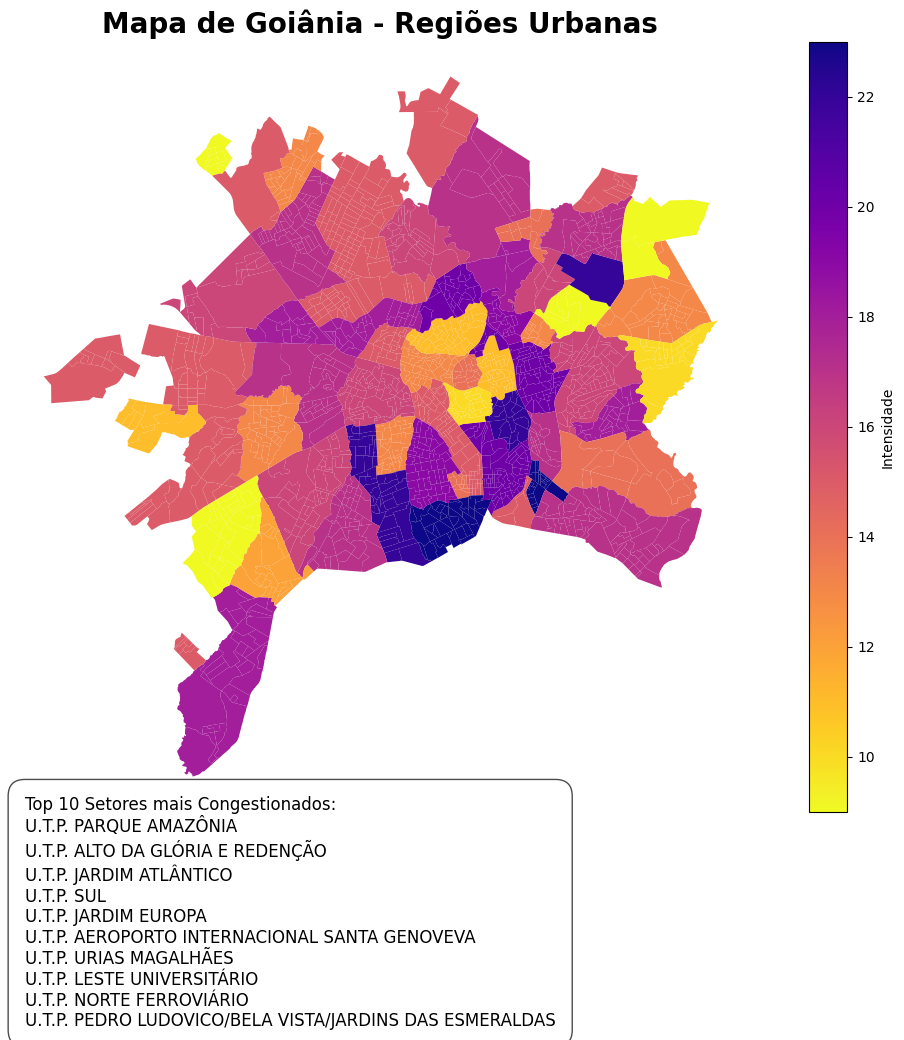

In [58]:
# Atualiza a localização
atualizar_localizacoes_aleatorias_tabela(tabela_hash_goiania, quantidade=100)

# Gerar vetor ordenado de ranking por Bairro
quantidade_veiculos = contar_veiculos_por_regiao(tabela_hash_goiania)
arquivo_csv = '/content/drive/MyDrive/ED2 - PROJETO FINAL/Base de Dados/bairrosGoiania.csv'
ranking_transito_setor = adicionar_nomes_ao_vetor(quantidade_veiculos, arquivo_csv)

# Chamar a função para plotar o mapa
plot_mapa_goiania(mapa_goiania, ranking_transito_setor)

# **End!**